In [143]:
import numpy as np
from scipy.linalg import sqrtm
import sys
float_formatter = lambda x : "%.3f" % x
np.set_printoptions(formatter=float_formatter,threshold=sys.maxsize)
from sklearn.datasets._samples_generator import make_circles,make_moons
from sklearn.metrics import pairwise_distances
from sklearn.cluster import SpectralClustering,KMeans
from matplotlib import pyplot as plt
import networkx as nx 
import seaborn as sns
sns.set()


Text(0, 0.5, 'Height')

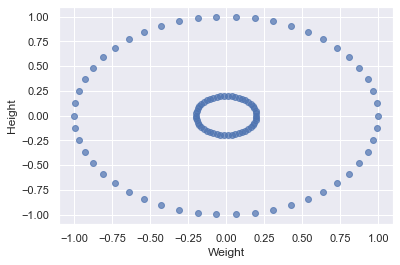

In [144]:
X,y = make_circles(factor=0.2)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')


In [145]:
W = pairwise_distances(X,metric="euclidean")
vectorizer = np.vectorize(lambda x : 1 if x<0.25 else 0)
W = vectorizer(W)


[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [146]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_labels(G,pos)
    nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)

In [147]:
#Degree matrix
D = np.diag(np.sum(W,axis=1))


[[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [148]:
# normalized laplacian matrix
L = D - W
DsqrN = sqrtm(np.linalg.matrix_power(D,-1))
L = np.matmul(np.matmul(DsqrN,L),DsqrN)


[[0.6666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.9523809523809522, 0.0, 0.0, 0.0, 0.0, 0.0, -0.04761904761904761, 0.0, -0.04761904761904761, -0.04761904761904761, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.04761904761904761, 0.0, 0.0, -0.04761904761904761, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.04761904761904761, -0.04761904761904761, 0.0, 0.0, -0.04761904761904761, 0.0, -0.04761904761904761, 0.0, 0.0, 0.0, -0.04761904761904761, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [149]:
#Now we gotta look for eigenvectors and eigenvalues of Laplacian matrix
e,v = np.linalg.eig(L)
print("eigenvalues : ", e.tolist())
print("eigenvectos shape " , v.shape)


eigenvalues :  [5.551115123125783e-17, 0.12732200375003444, 0.020944559247579254, 0.02094455924757954, 1.4001409910084018e-16, 0.04681567607449918, 0.04681567607449905, 0.005256865790348372, 0.005256865790348183, 0.08246221330409095, 0.0824622133040913, 0.4606553370833683, 0.24171734016754137, 0.18068758171905872, 0.30944880334733627, 0.12732200375003538, 0.18068758171905927, 0.38281380562328476, 0.382813805623286, 0.30944880334733593, 0.5417457902761829, 0.24171734016753887, 0.46065533708336764, 1.333333333333335, 0.5417457902761844, 0.2654463123010215, 1.3280764675429872, 0.708527013019542, 1.312388774085759, 1.2865176572588408, 1.328076467542988, 1.2508711200292408, 0.624806320313796, 0.6248063203137908, 0.791587543057154, 0.7085270130195418, 1.2060113295833015, 1.3123887740857516, 1.2865176572588346, 1.2508711200292428, 0.2654463123010206, 0.7915875430571541, 1.2060113295833048, 1.1526457516142774, 0.8726779962499673, 1.0916159931657954, 0.8726779962499672, 0.8169627440759346, 1.16

[0, 4]
number of clusters :  2


<function matplotlib.pyplot.show(close=None, block=None)>

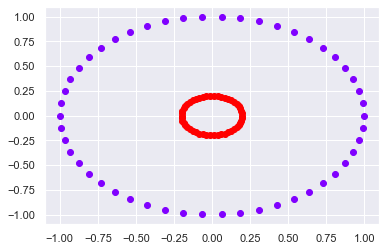

In [150]:
i = np.where(e < 1e-5)[0]
print(i.tolist())
print("number of clusters : ", len(i))
F = np.array([v[:,k] for k in i]).T
kmeans_clstr = KMeans(n_clusters=len(i)).fit(F)
colors = plt.cm.rainbow(np.linspace(0,1,len(i)))
for x in range(len(X)):
    plt.scatter(X[x,0],X[x,1],color=colors[kmeans_clstr.labels_[x]])
plt.show